In [16]:
import torch
import torch.nn as nn
import torchvision as tv

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from typing import Tuple, List

%matplotlib inline

In [2]:
def get_mnist_ds(is_train:bool):
    return tv.datasets.MNIST(root = Path('mnistdata'),
                             train = is_train,
                             transform = tv.transforms.ToTensor(),
                             target_transform = None,
                             download = True
                            )

In [6]:
def get_mnist_ds_loader(batch_size):
        train_ds = get_mnist_ds(is_train = True)
        valid_ds = get_mnist_ds(is_train = False)
        
        return (torch.utils.data.DataLoader(train_ds, batch_size, shuffle = True),
                torch.utils.data.DataLoader(valid_ds, 2*batch_size, shuffle = False))
    

In [7]:
train_dl, valid_dl = get_mnist_ds_loader(32)

In [8]:
len(train_dl.dataset), len(valid_dl.dataset)

(60000, 10000)

In [9]:
train_dl.dataset.data.shape

torch.Size([60000, 28, 28])

torch.Size([32, 1, 28, 28])


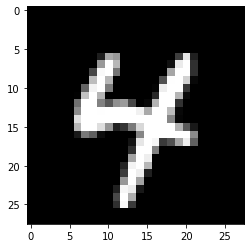

torch.Size([32, 1, 28, 28])


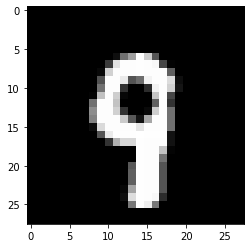

torch.Size([32, 1, 28, 28])


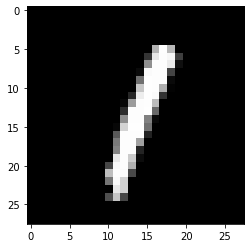

torch.Size([32, 1, 28, 28])


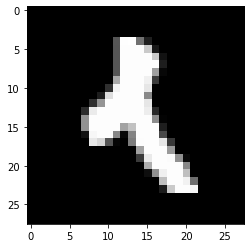

torch.Size([32, 1, 28, 28])


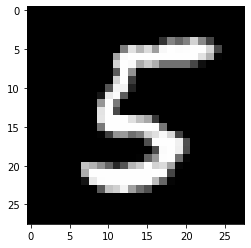

In [10]:
for i, x in enumerate(train_dl):
    print(x[0].shape)
    plt.imshow(x[0][0][0],cmap='gray')
    plt.show()
    if i>3 : break

In [17]:
class Encoder(nn.Module):
    def __init__(self, inp_size: Tuple[int,int], hidden_size: int, out_size: int):
        
        super().__init__()
        
        self.enc = nn.Sequential(nn.Flatten(),
                                 nn.Linear(np.prod(inp_size), hidden_size),
                                 nn.ReLU(),
                                 nn.Linear(hidden_size, out_size))
        
    def forward(self, x):
        return self.enc(x)
        

In [ ]:
class Decoder(nn.Module):
    def __init__(self, inp_size: int, hidden_size: int, out_size: Tuple[int,int]):
        
        super().__init__()
        
        self.dec = nn.Sequential(nn.Linear(inp_size, hidden_size),
                                 nn.Relu,
                                 nn.Linear(hidden_size, np.prod(out_size)),
                                 nn.Sigmoid())
        
    def forward(self, x):
        x = self.dec(x)
        return 